In [8]:
import numpy as np
import matplotlib.pyplot as plt
import mylibrary.nnlib as tnn

from sklearn.datasets import make_blobs

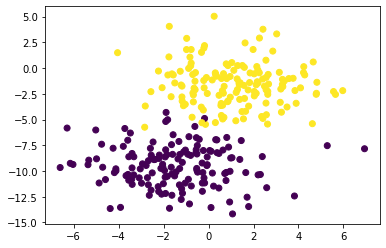

In [40]:
np.random.seed(2)
xx, y = make_blobs(n_samples=300, centers=2, n_features=2, cluster_std=2)
x1 = xx[:,0]
x2 = xx[:,1]
yy = y.reshape(-1,1)

%matplotlib inline
plt.scatter(x1, x2, c=yy)

In [69]:
optimizer = tnn.Adam()
linear = tnn.LinearLayer(2, 1, optimizer=optimizer)
sigmoid = tnn.Sigmoid()

In [70]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(111)

for epoch in range(100000):
    lout = linear.forward(xx)
    pout = sigmoid.forward(lout)
    
    yout = np.random.binomial(1, pout)
    dy = yout - yy
    dx = linear.backward(dy)
    linear.update()
    
    if epoch%100 == 0:
        
        error = np.abs(dy).mean()
        print(epoch, 'Error = ', error)
        y_ = (pout>0.5).astype(float)
        error_ = np.abs(y_ - yy).mean()
        print('Error_threshold = ', error_)
        
        ax.clear()
        ax.scatter(x1, x2, c=yy)
        ax.scatter(x1, x2, c=yout, marker='+')
        
        #### plot decision boundary
        ax.set_xlim((x1.min()-1, x1.max()+1))
        ax.set_ylim((x2.min()-1, x2.max()+1))

        (x1min, x1max) = ax.get_xlim()
        x2min = (-linear.bias[0] - linear.weights[0][0]*x1min)/linear.weights[1][0]
        x2max = (-linear.bias[0] - linear.weights[0][0]*x1max)/linear.weights[1][0]
        ax.plot([x1min, x1max], [x2min, x2max], lw=3)

        fig.canvas.draw()
        plt.pause(0.01)
        print()
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  0.6166666666666667
Error_threshold =  0.5833333333333334

100 Error =  0.42333333333333334
Error_threshold =  0.36333333333333334

200 Error =  0.30333333333333334
Error_threshold =  0.24666666666666667

300 Error =  0.23666666666666666
Error_threshold =  0.16333333333333333

400 Error =  0.20333333333333334
Error_threshold =  0.10333333333333333

500 Error =  0.2
Error_threshold =  0.06333333333333334

600 Error =  0.17666666666666667
Error_threshold =  0.043333333333333335

700 Error =  0.15333333333333332
Error_threshold =  0.03333333333333333

800 Error =  0.12333333333333334
Error_threshold =  0.02666666666666667

900 Error =  0.10666666666666667
Error_threshold =  0.02666666666666667

1000 Error =  0.11
Error_threshold =  0.02666666666666667

1100 Error =  0.10666666666666667
Error_threshold =  0.03

1200 Error =  0.04
Error_threshold =  0.03

1300 Error =  0.10333333333333333
Error_threshold =  0.03

1400 Error =  0.056666666666666664
Error_threshold =  0.023333333333

TclError: invalid command name "."

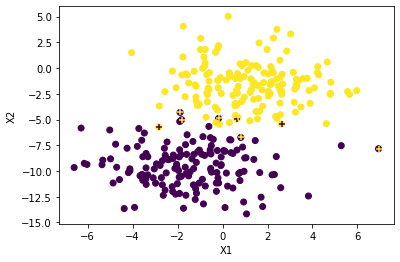

In [71]:
%matplotlib inline
plt.scatter(x1, x2, c=yy)
plt.scatter(x1, x2, c=yout, marker='+')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

## plot decision boundary

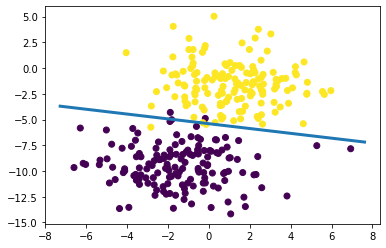

In [72]:
%matplotlib inline
plt.scatter(x1, x2, c=yy)
(x1min, x1max) = plt.xlim()
x2min = (-linear.bias[0] - linear.weights[0][0]*x1min)/linear.weights[1][0]
x2max = (-linear.bias[0] - linear.weights[0][0]*x1max)/linear.weights[1][0]
plt.plot([x1min, x1max], [x2min, x2max], lw=3)